# Спрос на рейсы авиакомпании

Вы аналитик российской авиакомпании F9, выполняющей внутренние пассажирские перевозки. Важно понять предпочтения пользователей, покупающих билеты на разные направления.

Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие культурные фестивали.

У вас есть файлы с результатами запросов из предыдущих заданий.

**query_1.csv** — результат первого запроса. В нём содержится такая информация:

- *model* — **модель самолета;
- *flights_amount* — количество рейсов для каждой модели самолетов *model* в сентябре 2018 года.

**query_3.csv** — результат третьего запроса. В нём содержится такая информация:

- *city* — город;
- *average_flights* — среднее количество рейсов, прибывающих в город (*city*) за день в сентябре 2018 года.

 Для этих двух наборов данных нужно:

- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность;
- выбрать топ-10 городов по количеству рейсов;
- построить графики: модели самолётов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
- сделать выводы по каждому из графиков, пояснить результат.


# Аналитика

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загрузим данные в pandas и изучим их ##

In [2]:
query_1 = pd.read_csv('/datasets/query_1.csv')
query_3 = pd.read_csv('/datasets/query_3.csv')

In [3]:
query_1

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Данные с результатами первого запроса представлены в виде одной таблицы:

* model — модель самолета;
* flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.

In [4]:
query_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


*Всего в таблице содержится 8 записей с указанием модели самолета и числа рейсов. Пропусков в данных нет. Приведения типов данных не требуется.*

In [5]:
query_3

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


Данные с результатами второго запроса представлены в виде одной таблицы:

* city — город;
* average_flights — среднее количество рейсов, прибывающих в город (city) за день в сентябре 2018 года.

In [6]:
query_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Выведем уникальные названия городов

In [7]:
query_3['city'].unique()

array(['Абакан', 'Анадырь', 'Анапа', 'Архангельск', 'Астрахань',
       'Барнаул', 'Белгород', 'Белоярский', 'Благовещенск', 'Братск',
       'Брянск', 'Бугульма', 'Владивосток', 'Владикавказ', 'Волгоград',
       'Воркута', 'Воронеж', 'Геленджик', 'Горно-Алтайск', 'Грозный',
       'Екатеринбург', 'Иваново', 'Ижевск', 'Иркутск', 'Йошкар-Ола',
       'Казань', 'Калининград', 'Калуга', 'Кемерово', 'Киров', 'Когалым',
       'Комсомольск-на-Амуре', 'Краснодар', 'Красноярск', 'Курган',
       'Курск', 'Кызыл', 'Липецк', 'Магадан', 'Магнитогорск', 'Махачкала',
       'Минеральные Воды', 'Мирный', 'Москва', 'Мурманск', 'Надым',
       'Нальчик', 'Нарьян-Мар', 'Нерюнгри', 'Нефтеюганск',
       'Нижневартовск', 'Нижнекамск', 'Нижний Новгород', 'Новокузнецк',
       'Новосибирск', 'Новый Уренгой', 'Норильск', 'Ноябрьск', 'Нягань',
       'Омск', 'Оренбург', 'Орск', 'Пенза', 'Пермь', 'Петрозаводск',
       'Петропавловск-Камчатский', 'Псков', 'Ростов-на-Дону', 'Салехард',
       'Самара', 'Санк

Проверим на отсутствие дубликатов в названиях городов

In [8]:
query_3['city'].duplicated().sum()

0

*Всего в таблице содержится 101 запись с указанием города и среднего корличества прибывающих рейсов. Пропусков в данных нет. Дубликатов так же нет. Приведения типов данных не требуется.*

**Вывод**

*Данные запросов подготовлены для анализа и визуализации.*

## Анализ и визуализация ##

**Модели самолётов и количество рейсов**

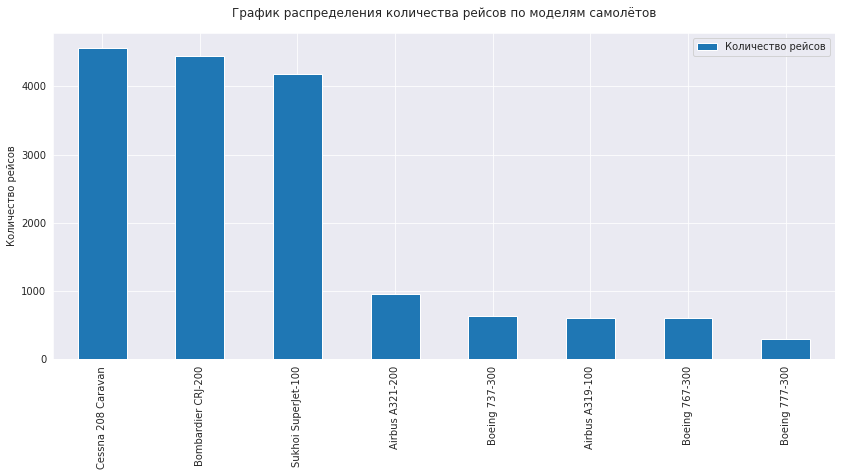

In [9]:
sns.set_style("darkgrid")
sns.set_context(font_scale=1.15)

query_1_sort = query_1.sort_values(by='flights_amount', ascending=False)

query_1_sort.plot(x='model', kind='bar', grid=True, figsize=(14,6))
plt.title('График распределения количества рейсов по моделям самолётов', y=1.03)
plt.xlabel('')
plt.ylabel('Количество рейсов')
plt.legend(['Количество рейсов'],loc='upper right')

plt.show()

*На графике распределения количества рейсов по моделям самолётов имеется следующая зависимость:*

Для моделей "Cessna 208 Caravan","Bombardier CRJ-200" и "Sukhoi SuperJet-100" наблюдаетеся высокая популярность по сравнению с другими моделми из-за малой дальности полета. Эта линейка самолетов малой авиации популярна в западной части Россиии, где находится много городов близко друг к другу.
Остальные модели расчитаны на далекие перелеты к примеру Москва - Владивосток.

**Города и количество рейсов**

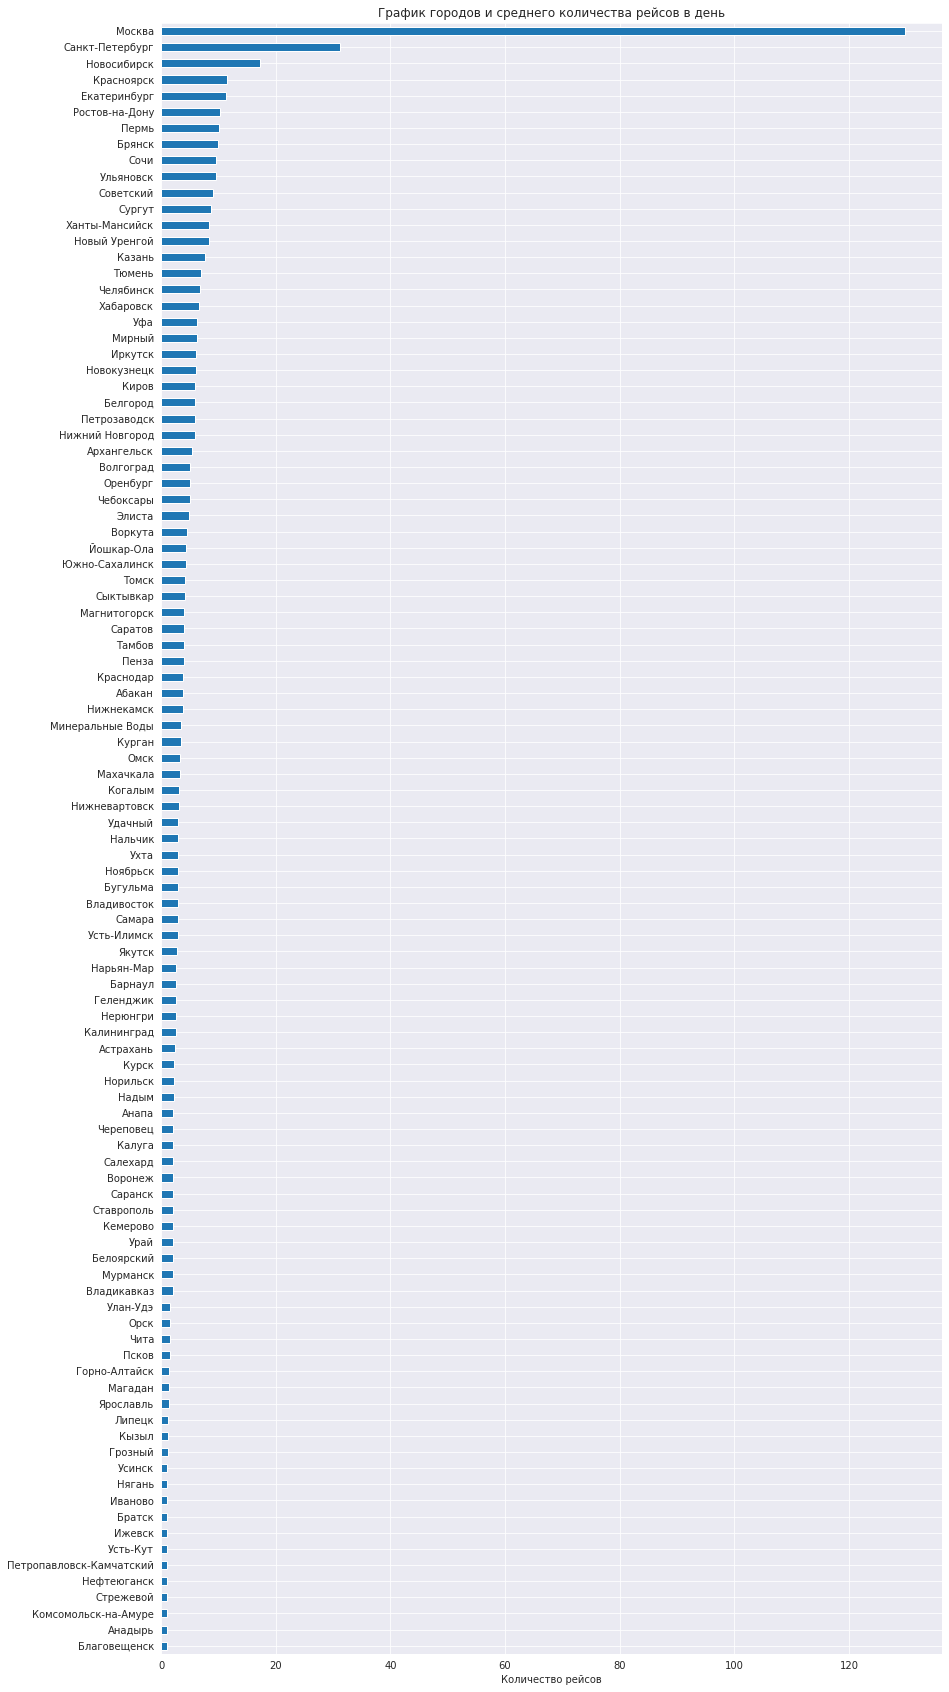

In [10]:
query_3.sort_values(by='average_flights',ascending=True).plot(
    x='city', kind='barh', grid=True, figsize=(14,30),legend=False, align='center')
plt.title('График городов и среднего количества рейсов в день')
plt.ylabel('')
plt.xlabel('Количество рейсов')
plt.show()

*На графике городов и среднего количества рейсов в день имеется следующая зависимость:*

По числу прибывающих рейсов Москва - безусловный лидер, далее следуют Санкт-Петербург и Новосибирск. Данные города являются наиболее густонаселенными в России. Они являются важными воздушнотранспортными узлами, где можно пересесть на международный рейс или стыковочный. Также их популярность связанна с тем, что в каждом из этих городов имеется большое количество аэропортов.

**Топ-10 городов и количество рейсов**

Выберем топ-10 городов по количеству рейсов и нанесём их на график для наглядности

In [11]:
query_3_top10=query_3.sort_values(by='average_flights',ascending=False)[:10].copy()
query_3_top10

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


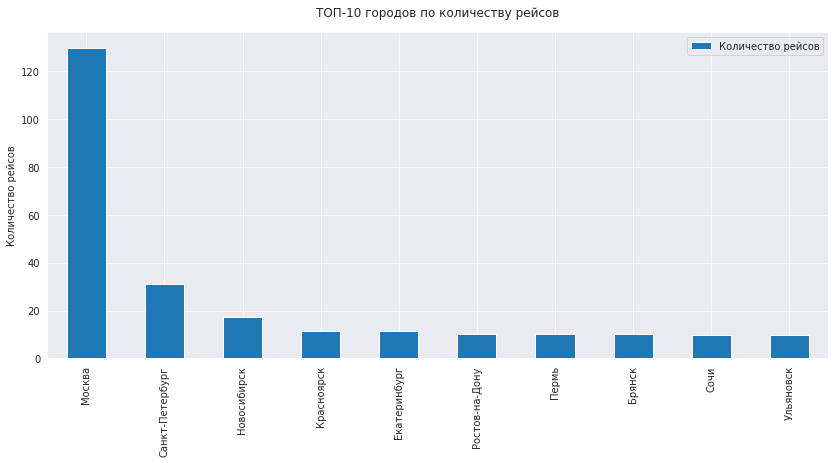

In [12]:
query_3_top10.plot(x='city', kind='bar', grid=True, figsize=(14,6))
plt.title('ТОП-10 городов по количеству рейсов', y=1.03)
plt.xlabel('')
plt.ylabel('Количество рейсов')
plt.legend(['Количество рейсов'],loc='upper right')
plt.show()

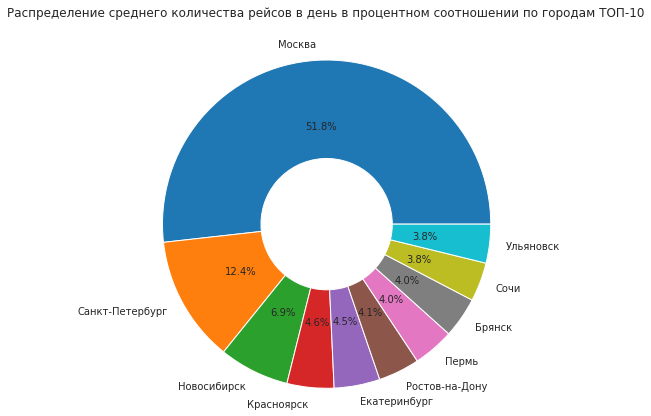

ТОП-10 городов составляет 45.2% от всего количества рейсов


In [13]:
vals = query_3_top10.average_flights
labels = query_3_top10.city

fig, ax = plt.subplots(figsize=(6.5,6.5))
ax.pie(vals, labels=labels, wedgeprops=dict(width=0.6), autopct='%1.1f%%')
ax.axis("equal")
plt.title('Распределение среднего количества рейсов в день в процентном соотношении по городам ТОП-10', y=1.07)
plt.show()
print('ТОП-10 городов составляет {:.1%} от всего количества рейсов'.format(query_3_top10.average_flights.sum()
                                                                           /query_3.average_flights.sum()))

*На графике ТОП-10 городов по количеству рейсов имеется следующая зависимость:*

Москва занимает первое место за счет большего количества аэропортов, чем у остальных городов.
Кроме этого Москва, Санкт-Петербург, Новосибирск являются важными воздушними узлами для международных полетов. Большинство перелетов в эти города происходят из-за пересадки на другой рейс для полета за границу.

## Общий вывод ##

*Была проведена проверка и анализ данных, сформированных по результатам SQL запросов. В рамках анализа представленных данных были получены следующие результаты:*

* Наибольшее число рейсов пришлось на модель самолета "Cessna 208 Caravan"
* В ТОП-3 производителей самолетов, выполнивших наибольшее число рейсов, входят Cessna, Bombardier, Sukhoi, далее следуют Airbus и Boeing
* В ТОП-10 городов по посещаемости вошли: Москва, Санкт-Петербург, Новосибирск (ТОП-3), Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи и Ульяновск
* На Москву приходится более половины рейсов от всех рейсов, прибывающих в ТОП-10 городов
* На ТОП-3 приходится порядка 70% рейсов от всех рейсов, прибывающих в ТОП-10 городов
* 7 из 10 городов из ТОП-10 входят также в перечень 15 наиболее густонаселенных городов России.